In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls drive/MyDrive/CaseStudy/

'AirBnB_Prediction_Challenge_Case Study and guidelines.docx'
'case study.zip'
'case study.zip (Unzipped Files)'/
 Cleaned_Train.csv
 test.xlsx
 train.csv


In [ ]:
working_directory = "drive/MyDrive/CaseStudy/"

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
Train_Dataset = pd.read_csv(working_directory + 'Cleaned_Train.csv')

In [ ]:
Train_Dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
print(Train_Dataset.iloc[0, :60])

0       1.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
30      0.000000
31      0.000000
32      0.000000
33      1.000000
34      0.000000
35      0.000000
36      0.000000
37      0.000000
38      0.000000
39      0.000000
40      1.000000
41      0.000000
42      0.000000
43      0.000000
44      0.000000
45      1.000000
46      0.000000
47      3.000000
48      1.000000
49      1.000000
50      2.000000
51    100.000000
52      1.000000
53      1.000000
54      5.010635
55      0.000000
56      0.000000
57      1.000000
58      0.0000

In [ ]:
Train_Dataset.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64

In [ ]:
Train_Dataset.isnull().sum().sum()

0

In [ ]:
Train_Dataset.shape

(49760, 200)

In [ ]:
Train_Dataset.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '190', '191', '192', '193', '194', '195', '196', '197', '198', '199'],
      dtype='object', length=200)

In [ ]:
X = Train_Dataset.iloc[:, Train_Dataset.columns != '54'].values
y = Train_Dataset.iloc[:, 54].values


In [ ]:
X.shape

(49760, 199)

In [ ]:
X

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
X[0]

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   1.,   0.,   3.,   1.,   1.,   2., 100.,   1.,   1.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
y

array([5.01063529, 5.12989872, 4.97673374, ..., 5.0689042 , 4.2341065 ,
       3.87120101])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

## Applying Deep Learning Model
### ANN with 4 Layer

In [ ]:
import time
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from keras import models, layers, optimizers, regularizers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               25600     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 256,513
Trainable params: 256,513
Non-trainable params: 0
_________________________________________________________________
None


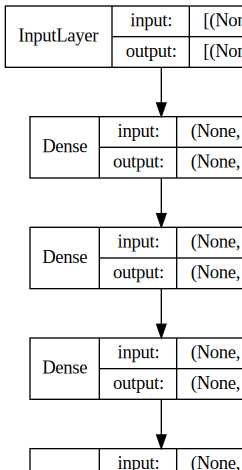

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(x_train.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dense(1, activation='linear'))

# Compiling the model
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(model.summary())

# Visualising the neural network
SVG(model_to_dot(model, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
# Training the model
model_start = time.time()

model_history = model.fit(x_train,
                  y_train,
                  epochs=50,
                  batch_size=256,
                  validation_split=0.1)

model_end = time.time()

print(f"Time taken to run: {round((model_end - model_start)/60,1)} minutes")

Epoch 1/50
140/140 [==============================] - 2s 13ms/step - loss: 50.4920 - mean_squared_error: 3.1254 - val_loss: 19.0149 - val_mean_squared_error: 0.3919
Epoch 2/50
140/140 [==============================] - 2s 11ms/step - loss: 16.6222 - mean_squared_error: 0.3367 - val_loss: 11.4147 - val_mean_squared_error: 0.2903
Epoch 3/50
140/140 [==============================] - 2s 11ms/step - loss: 10.2867 - mean_squared_error: 0.2746 - val_loss: 7.5857 - val_mean_squared_error: 0.3134
Epoch 4/50
140/140 [==============================] - 1s 11ms/step - loss: 6.8837 - mean_squared_error: 0.2668 - val_loss: 5.2119 - val_mean_squared_error: 0.2619
Epoch 5/50
140/140 [==============================] - 2s 11ms/step - loss: 4.7730 - mean_squared_error: 0.2438 - val_loss: 3.6759 - val_mean_squared_error: 0.2353
Epoch 6/50
140/140 [==============================] - 1s 11ms/step - loss: 3.4046 - mean_squared_error: 0.2422 - val_loss: 2.6621 - val_mean_squared_error: 0.2246
Epoch 7/50
140/14

In [ ]:
from sklearn import metrics
def evaluate_model(y_test, y_pred):
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  #evaluation matrices(MAE, MSE, RMSE)
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
  print('R Square Error:', metrics.r2_score(y_test, y_pred))

In [ ]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [ ]:
print("Train")
evaluate_model(y_train, y_train_pred)

Train
Mean Absolute Error: 0.34690496576347396
Mean Squared Error: 0.21248685931078284
Root Mean Squared Error: 0.4609629695656505
R Square Error: 0.5861566475472848


In [ ]:
print("Test")
evaluate_model(y_test, y_test_pred)

Test
Mean Absolute Error: 0.35353978449533213
Mean Squared Error: 0.22508428822209198
Root Mean Squared Error: 0.4744304882931661
R Square Error: 0.5661598945176751


In [ ]:
model.save(working_directory+'dl_model.h5')